In [12]:
%matplotlib notebook
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [13]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [14]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.4

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])
[0.8597, 0.92135, 0.93605, 0.9399333333333333, 0.9471, 0.9493833333015442, 0.9509833333333333, 0.9536166666984558, 0.9542166666348775, 0.9561500000317892, 0.9564499999682109, 0.9578833333015442, 0.9593999999682109, 0.9591499999682108, 0.9600666666984559, 0.9618666666984558, 0.9619000000317891, 0.9637999999682109, 0.9629666666666666, 0.9636666666666667]


<IPython.core.display.Javascript object>


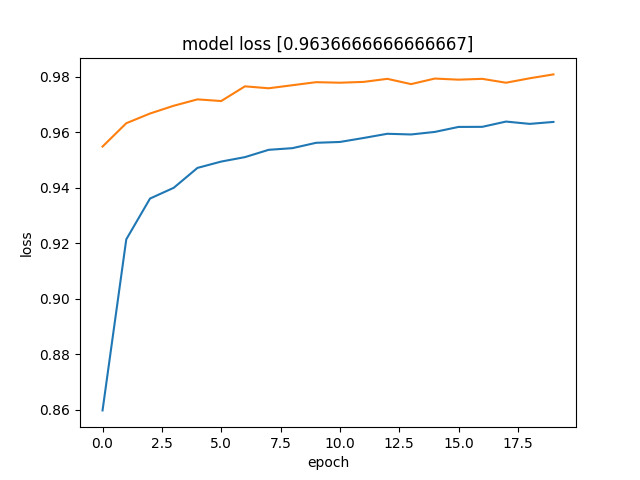

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
print(history.history.keys())
print(history.history['acc'])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc [{}]'.format(history.history['acc'][-1]))
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:
model2 = Sequential()
model2.add(Dense(1024, activation='relu', input_shape=(784,)))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 54s 898us/step - loss: 0.1928 - acc: 0.9417 - val_loss: 0.0957 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 40s 669us/step - loss: 0.0733 - acc: 0.9769 - val_loss: 0.0921 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 45s 758us/

In [17]:
#http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

<IPython.core.display.Javascript object>


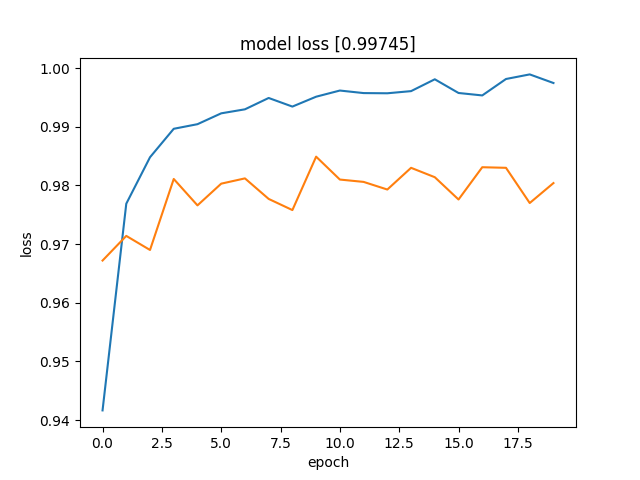

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model acc [{}]'.format(history2.history['acc'][-1]))
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()